In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re

In [2]:
df = pd.read_csv('train.csv')

In [3]:
#CORRELAÇÕES

In [5]:
#Create city ID: IDF

# Sua coluna de tipos de combustível
city= df['city']

# Número de documentos (ou entradas) no DataFrame
n_docs = len(df)

idf = {}

# Usando drop_duplicates para obter valores únicos
unique_cities = city.drop_duplicates()

for city in unique_cities:
    k = sum(city in row for row in df['city'])  # contagem de documentos que contêm este tipo de combustível
    idf[city] = np.log10(n_docs / (k + 1))  # Adicionei +1 para evitar divisão por zero

for city, value in idf.items():
    print(f'{city:>15}: {value:>10}')

# Criar nova coluna 'idf' no DataFrame
df['id_city'] = df['city'].map(idf)

# Se desejar imprimir o DataFrame com a nova coluna
#print(df)

           Pune: 1.0890004960883384
         Jaipur: 1.289241805108273
         Mumbai: 0.9181610555687159
        Kolkata: 1.1739493499035554
          Delhi: 0.7611250924141936
      Bangalore: 0.8701413416848351
      Hyderabad: 1.0331624358956792
        Chennai: 1.1252292762448177
        Gurgaon: 1.2215169421457968
     Chandigarh: 1.6031817168294924
      Ahmedabad: 1.1198650006685882
        Lucknow: 1.5102836906153416
           Agra: 1.89190792979618


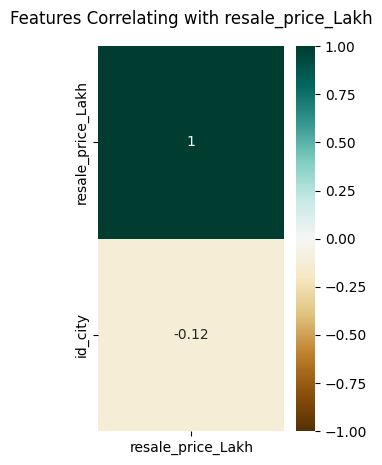

In [6]:
#correlation  

# Select columns
columns_of_interest = ['id_city', 'resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(3, 5))

# Creat heatmap
heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 12}, pad=16)

plt.show()